In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

backend = BasicAer.get_backend('qasm_simulator')
unitary_backend = BasicAer.get_backend('unitary_simulator')
number_of_shots = 1024

In [2]:
q00 = QuantumRegister(2)
c00 = ClassicalRegister(2)
qc00 = QuantumCircuit(q00, c00)
q01 = QuantumRegister(2)
c01 = ClassicalRegister(2)
qc01 = QuantumCircuit(q01, c01)
q10 = QuantumRegister(2)
c10 = ClassicalRegister(2)
qc10 = QuantumCircuit(q10, c10)
q11 = QuantumRegister(2)
c11 = ClassicalRegister(2)
qc11 = QuantumCircuit(q11, c11)

In [3]:
#setting up the starting state
qc00.h(0)
qc00.h(1)
qc10.h(0)
qc10.h(1)
qc01.h(0)
qc01.h(1)
qc11.h(0)
qc11.h(1)

In [4]:
#oracle inverts the sign of the state if the state is the correct one
#we build it by inverting all supposedly zero qbits, applying H cNOT H that equals cZ which inverts the sign
#for state |11> and then reversing the inversion
qc00.x(0)
qc00.x(1)
qc01.x(1)
qc10.x(0)

qc00.h(0)
qc00.cx(1,0)
qc00.h(0)

qc01.h(0)
qc01.cx(1,0)
qc01.h(0)

qc10.h(0)
qc10.cx(1,0)
qc10.h(0)

qc11.h(0)
qc11.cx(1,0)
qc11.h(0)

qc00.x(0)
qc00.x(1)
qc01.x(1)
qc10.x(0)

In [5]:
#another projection operator that behaves similiarly for each oracle
#we create W operator by enveloping cZ in X's and then H's, transforming it from 1-2|11><11| to 1-2|00><00| and then
#to minus desired operator 1- 2|psi><psi|

qc00.h(0)
qc00.h(1)
qc00.x(0)
qc00.x(1)

#cZ
qc00.h(0)
qc00.cx(1,0)
qc00.h(0)

qc00.x(0)
qc00.x(1)
qc00.h(0)
qc00.h(1)

qc01.h(0)
qc01.h(1)
qc01.x(0)
qc01.x(1)

#cZ
qc01.h(0)
qc01.cx(1,0)
qc01.h(0)

qc01.x(0)
qc01.x(1)
qc01.h(0)
qc01.h(1)

qc10.h(0)
qc10.h(1)
qc10.x(0)
qc10.x(1)

#cZ
qc10.h(0)
qc10.cx(1,0)
qc10.h(0)

qc10.x(0)
qc10.x(1)
qc10.h(0)
qc10.h(1)

qc11.h(0)
qc11.h(1)
qc11.x(0)
qc11.x(1)

#cZ
qc11.h(0)
qc11.cx(1,0)
qc11.h(0)

qc11.x(0)
qc11.x(1)
qc11.h(0)
qc11.h(1)

In [6]:
#measure & display
qc00.measure(q00, c00)
qc00.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌─┐
q0_0: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤M├
      ├───┤├───┤└───┘└─┬─┘├───┤├───┤├───┤└───┘└───┘└─┬─┘├───┤├───┤└┬─┬┘└╥┘
q0_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─┤M├──╫─
      └───┘└───┘          └───┘└───┘└───┘               └───┘└───┘ └╥┘  ║ 
c0: 2/══════════════════════════════════════════════════════════════╩═══╩═
                                                                    1   0

In [7]:
qc01.measure(q01, c01)
qc01.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌─┐
q1_0: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤M├
      ├───┤├───┤└─┬─┘├───┤├───┤├───┤└───┘└─┬─┘├───┤├───┤└┬─┬┘└╥┘
q1_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├─┤M├──╫─
      └───┘└───┘     └───┘└───┘└───┘          └───┘└───┘ └╥┘  ║ 
c1: 2/════════════════════════════════════════════════════╩═══╩═
                                                          1   0

In [8]:
qc10.measure(q10, c10)
qc10.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌─┐
q2_0: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤M├
      ├───┤└───┘└───┘└─┬─┘├───┤├───┤└───┘└───┘└───┘└─┬─┘├───┤├───┤└┬─┬┘└╥┘
q2_1: ┤ H ├────────────■──┤ H ├┤ X ├─────────────────■──┤ X ├┤ H ├─┤M├──╫─
      └───┘               └───┘└───┘                    └───┘└───┘ └╥┘  ║ 
c2: 2/══════════════════════════════════════════════════════════════╩═══╩═
                                                                    1   0

In [9]:
qc11.measure(q11, c11)
qc11.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌─┐
q3_0: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤M├
      ├───┤└───┘└─┬─┘├───┤├───┤└───┘└───┘└─┬─┘├───┤├───┤└┬─┬┘└╥┘
q3_1: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─┤M├──╫─
      └───┘          └───┘└───┘               └───┘└───┘ └╥┘  ║ 
c3: 2/════════════════════════════════════════════════════╩═══╩═
                                                          1   0

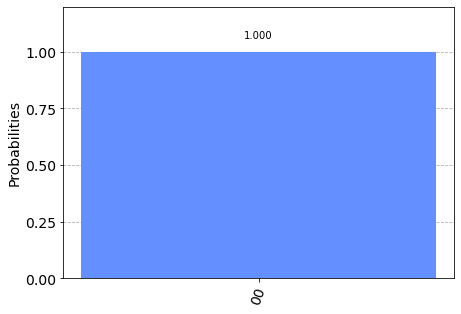

In [10]:
from qiskit.tools.visualization import plot_histogram
job = execute(qc00, backend, shots=number_of_shots)

result = job.result()
plot_histogram([result.get_counts(qc00)])

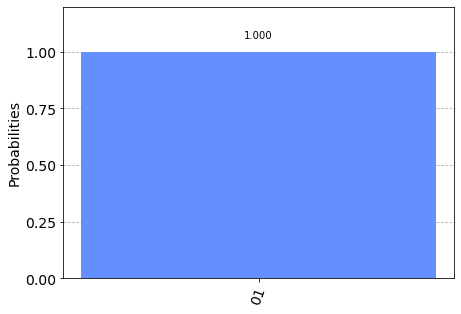

In [11]:
job = execute(qc01, backend, shots=number_of_shots)

result = job.result()
plot_histogram([result.get_counts(qc01)])

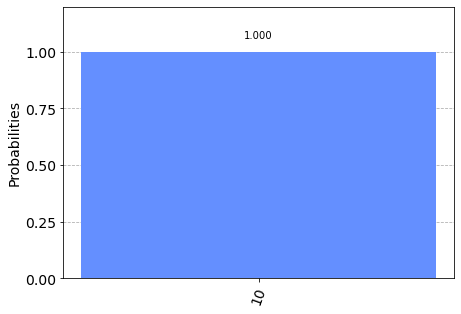

In [12]:
job = execute(qc10, backend, shots=number_of_shots)

result = job.result()
plot_histogram([result.get_counts(qc10)])

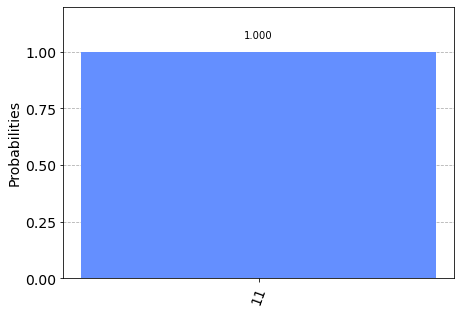

In [13]:
job = execute(qc11, backend, shots=number_of_shots)

result = job.result()
plot_histogram([result.get_counts(qc11)])

In [14]:
#as we see, Grover search finds everything in one iteration
#let's redo the same operations but apply the algorithm
qc00.reset(q00[0])
qc00.reset(q00[1])
qc01.reset(q01[0])
qc01.reset(q01[1])
qc10.reset(q10[0])
qc10.reset(q10[1])
qc11.reset(q11[0])
qc11.reset(q11[1])

In [15]:
#setting up the starting state
qc00.h(0)
qc00.h(1)
qc10.h(0)
qc10.h(1)
qc01.h(0)
qc01.h(1)
qc11.h(0)
qc11.h(1)

In [16]:
#oracle inverts the sign of the state if the state is the correct one
#we build it by inverting all supposedly zero qbits, applying H cNOT H that equals cZ and then reversing the inversion
qc00.x(0)
qc00.x(1)
qc01.x(1)
qc10.x(0)

qc00.h(0)
qc00.cx(1,0)
qc00.h(0)

qc01.h(0)
qc01.cx(1,0)
qc01.h(0)

qc10.h(0)
qc10.cx(1,0)
qc10.h(0)

qc11.h(0)
qc11.cx(1,0)
qc11.h(0)

qc00.x(0)
qc00.x(1)
qc01.x(1)
qc10.x(0)

In [17]:
#another projection operator that behaves similiarly for each oracle
#we create W operator by enveloping cZ in X's and then H's, transforming it from 1-2|11><11| to 1-2|00><00| and then
#to minus desired operator 1- 2|psi><psi|

qc00.h(0)
qc00.h(1)
qc00.x(0)
qc00.x(1)

#cZ
qc00.h(0)
qc00.cx(1,0)
qc00.h(0)

qc00.x(0)
qc00.x(1)
qc00.h(0)
qc00.h(1)

qc01.h(0)
qc01.h(1)
qc01.x(0)
qc01.x(1)

#cZ
qc01.h(0)
qc01.cx(1,0)
qc01.h(0)

qc01.x(0)
qc01.x(1)
qc01.h(0)
qc01.h(1)

qc10.h(0)
qc10.h(1)
qc10.x(0)
qc10.x(1)

#cZ
qc10.h(0)
qc10.cx(1,0)
qc10.h(0)

qc10.x(0)
qc10.x(1)
qc10.h(0)
qc10.h(1)

qc11.h(0)
qc11.h(1)
qc11.x(0)
qc11.x(1)

#cZ
qc11.h(0)
qc11.cx(1,0)
qc11.h(0)

qc11.x(0)
qc11.x(1)
qc11.h(0)
qc11.h(1)

In [18]:
#oracle inverts the sign of the state if the state is the correct one
#we build it by inverting all supposedly zero qbits, applying H cNOT H that equals cZ and then reversing the inversion
qc00.x(0)
qc00.x(1)
qc01.x(1)
qc10.x(0)

qc00.h(0)
qc00.cx(1,0)
qc00.h(0)

qc01.h(0)
qc01.cx(1,0)
qc01.h(0)

qc10.h(0)
qc10.cx(1,0)
qc10.h(0)

qc11.h(0)
qc11.cx(1,0)
qc11.h(0)

qc00.x(0)
qc00.x(1)
qc01.x(1)
qc10.x(0)

In [19]:
#another projection operator that behaves similiarly for each oracle
#we create W operator by enveloping cZ in X's and then H's, transforming it from 1-2|11><11| to 1-2|00><00| and then
#to minus desired operator 1- 2|psi><psi|

qc00.h(0)
qc00.h(1)
qc00.x(0)
qc00.x(1)

#cZ
qc00.h(0)
qc00.cx(1,0)
qc00.h(0)

qc00.x(0)
qc00.x(1)
qc00.h(0)
qc00.h(1)

qc01.h(0)
qc01.h(1)
qc01.x(0)
qc01.x(1)

#cZ
qc01.h(0)
qc01.cx(1,0)
qc01.h(0)

qc01.x(0)
qc01.x(1)
qc01.h(0)
qc01.h(1)

qc10.h(0)
qc10.h(1)
qc10.x(0)
qc10.x(1)

#cZ
qc10.h(0)
qc10.cx(1,0)
qc10.h(0)

qc10.x(0)
qc10.x(1)
qc10.h(0)
qc10.h(1)

qc11.h(0)
qc11.h(1)
qc11.x(0)
qc11.x(1)

#cZ
qc11.h(0)
qc11.cx(1,0)
qc11.h(0)

qc11.x(0)
qc11.x(1)
qc11.h(0)
qc11.h(1)

In [20]:
#measure & display
qc00.measure(q00, c00)
qc00.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌─┐     »
q0_0: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤M├─|0>─»
      ├───┤├───┤└───┘└─┬─┘├───┤├───┤├───┤└───┘└───┘└─┬─┘├───┤├───┤└┬─┬┘└╥┘     »
q0_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─┤M├──╫──|0>─»
      └───┘└───┘          └───┘└───┘└───┘               └───┘└───┘ └╥┘  ║      »
c0: 2/══════════════════════════════════════════════════════════════╩═══╩══════»
                                                                    1   0      »
«      ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐»
«q0_0: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├»
«      ├───┤├───┤└───┘└─┬─┘├───┤├───┤├───┤└───┘└───┘└─┬─┘├───┤├───┤├───┤└───┘»
«q0_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├────────────■──┤ X ├┤ H ├┤ X ├─────»
«      └───┘└───┘          └───┘└───┘└───┘               └───┘└───┘└───┘     »
«c0: 2/══════════════════════════════════════════════════════════════════════»
«                                                                            »
«      ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌─┐
«q0_0: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤M├
«      └───┘└─┬─┘├───┤├───┤├───┤└───┘└───┘└─┬─┘├───┤├───┤└┬─┬┘└╥┘
«q0_1: ───────■──┤ X ├┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─┤M├──╫─
«                └───┘└───┘└───┘               └───┘└───┘ └╥┘  ║ 
«c0: 2/════════════════════════════════════════════════════╩═══╩═
«                                                          1   0

In [21]:
qc01.measure(q01, c01)
qc01.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌─┐     ┌───┐┌───┐»
q1_0: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤M├─|0>─┤ H ├┤ H ├»
      ├───┤├───┤└─┬─┘├───┤├───┤├───┤└───┘└─┬─┘├───┤├───┤└┬─┬┘└╥┘     ├───┤├───┤»
q1_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├─┤M├──╫──|0>─┤ H ├┤ X ├»
      └───┘└───┘     └───┘└───┘└───┘          └───┘└───┘ └╥┘  ║      └───┘└───┘»
c1: 2/════════════════════════════════════════════════════╩═══╩════════════════»
                                                          1   0                »
«      ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐»
«q1_0: ┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├»
«      └─┬─┘├───┤├───┤├───┤└───┘└─┬─┘├───┤├───┤├───┤└───┘└─┬─┘├───┤├───┤├───┤»
«q1_1: ──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├»
«           └───┘└───┘└───┘          └───┘└───┘└───┘          └───┘└───┘└───┘»
«c1: 2/══════════════════════════════════════════════════════════════════════»
«                                                                            »
«      ┌───┐┌───┐┌───┐┌───┐┌───┐┌─┐
«q1_0: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤M├
«      └───┘└─┬─┘├───┤├───┤└┬─┬┘└╥┘
«q1_1: ───────■──┤ X ├┤ H ├─┤M├──╫─
«                └───┘└───┘ └╥┘  ║ 
«c1: 2/══════════════════════╩═══╩═
«                            1   0

In [22]:
qc10.measure(q10, c10)
qc10.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌─┐     »
q2_0: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤M├─|0>─»
      ├───┤└───┘└───┘└─┬─┘├───┤├───┤└───┘└───┘└───┘└─┬─┘├───┤├───┤└┬─┬┘└╥┘     »
q2_1: ┤ H ├────────────■──┤ H ├┤ X ├─────────────────■──┤ X ├┤ H ├─┤M├──╫──|0>─»
      └───┘               └───┘└───┘                    └───┘└───┘ └╥┘  ║      »
c2: 2/══════════════════════════════════════════════════════════════╩═══╩══════»
                                                                    1   0      »
«      ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐»
«q2_0: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├»
«      ├───┤└───┘└───┘└─┬─┘├───┤├───┤└───┘└───┘└───┘└─┬─┘├───┤├───┤└───┘└───┘»
«q2_1: ┤ H ├────────────■──┤ H ├┤ X ├─────────────────■──┤ X ├┤ H ├──────────»
«      └───┘               └───┘└───┘                    └───┘└───┘          »
«c2: 2/══════════════════════════════════════════════════════════════════════»
«                                                                            »
«      ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌─┐
«q2_0: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤M├
«      └───┘└─┬─┘├───┤├───┤└───┘└───┘└───┘└─┬─┘├───┤├───┤└┬─┬┘└╥┘
«q2_1: ───────■──┤ H ├┤ X ├─────────────────■──┤ X ├┤ H ├─┤M├──╫─
«                └───┘└───┘                    └───┘└───┘ └╥┘  ║ 
«c2: 2/════════════════════════════════════════════════════╩═══╩═
«                                                          1   0

In [23]:
qc11.measure(q11, c11)
qc11.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌─┐     ┌───┐┌───┐»
q3_0: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤M├─|0>─┤ H ├┤ H ├»
      ├───┤└───┘└─┬─┘├───┤├───┤└───┘└───┘└─┬─┘├───┤├───┤└┬─┬┘└╥┘     ├───┤└───┘»
q3_1: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─┤M├──╫──|0>─┤ H ├─────»
      └───┘          └───┘└───┘               └───┘└───┘ └╥┘  ║      └───┘     »
c3: 2/════════════════════════════════════════════════════╩═══╩════════════════»
                                                          1   0                »
«      ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐»
«q3_0: ┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├»
«      └─┬─┘├───┤├───┤└───┘└───┘└─┬─┘├───┤├───┤└───┘└───┘└─┬─┘├───┤├───┤└───┘»
«q3_1: ──■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├────────────■──┤ H ├┤ X ├─────»
«           └───┘└───┘               └───┘└───┘               └───┘└───┘     »
«c3: 2/══════════════════════════════════════════════════════════════════════»
«                                                                            »
«      ┌───┐┌───┐┌───┐┌───┐┌───┐┌─┐
«q3_0: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤M├
«      └───┘└─┬─┘├───┤├───┤└┬─┬┘└╥┘
«q3_1: ───────■──┤ X ├┤ H ├─┤M├──╫─
«                └───┘└───┘ └╥┘  ║ 
«c3: 2/══════════════════════╩═══╩═
«                            1   0

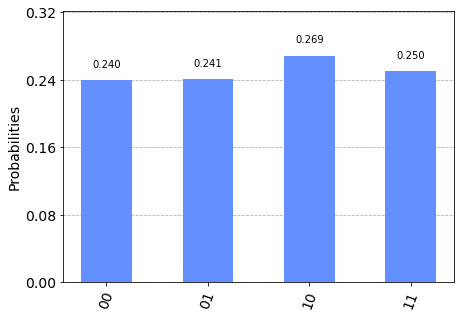

In [24]:
from qiskit.tools.visualization import plot_histogram
job = execute(qc00, backend, shots=number_of_shots)

result = job.result()
plot_histogram([result.get_counts(qc00)])

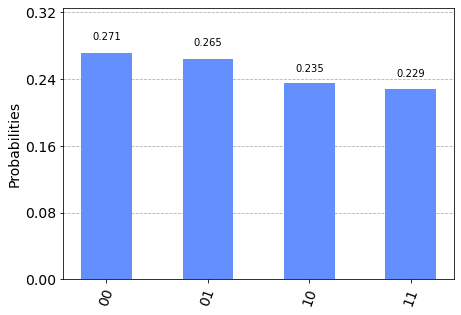

In [25]:
job = execute(qc01, backend, shots=number_of_shots)

result = job.result()
plot_histogram([result.get_counts(qc01)])

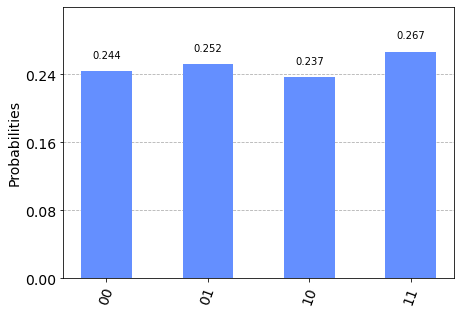

In [26]:
job = execute(qc10, backend, shots=number_of_shots)

result = job.result()
plot_histogram([result.get_counts(qc10)])

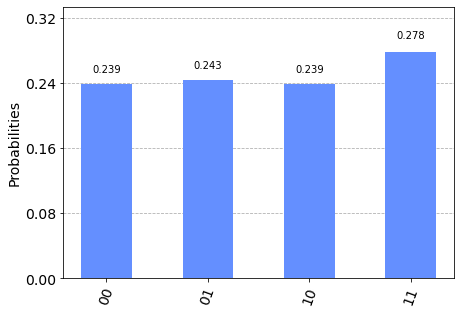

In [27]:
job = execute(qc11, backend, shots=number_of_shots)

result = job.result()
plot_histogram([result.get_counts(qc11)])

In [28]:
#as we can see. overapplying the algorithm makes it stop working